In [1]:
!pip install -Uqq fastai
import numpy as np 
import pandas as pd
import seaborn as sns
import os
from pathlib import Path
from fastai.metrics import error_rate
from fastai.vision.all import * 
import timm
import torch
import pickle

In [2]:
# For Kaggle use must create path to current directory
# path = Path('../input/chest-xray-pneumonia/chest_xray'); 
# path.ls()

# Please have train, test, and validation sets downloaded from kaggle and in the current 
# working directory in order for code to work. Github will not allow the upload of files
# over 25mb so you will need to download data from https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
path = os.getcwd()
print(path)

(#5) [Path('../input/chest-xray-pneumonia/chest_xray/chest_xray'),Path('../input/chest-xray-pneumonia/chest_xray/__MACOSX'),Path('../input/chest-xray-pneumonia/chest_xray/val'),Path('../input/chest-xray-pneumonia/chest_xray/test'),Path('../input/chest-xray-pneumonia/chest_xray/train')]

In [3]:
train_fnames = get_image_files(path/'train')
val_fnames = get_image_files(path/'val')
test_fnames = get_image_files(path/'test')

total_files = get_image_files(path)

L(train_fnames, val_fnames, test_fnames).map(len)

(#3) [5216,16,624]

In [4]:
def get_dls(bs, size, files):
    train_idxs= [i for i, fname in enumerate(files) if "test" not in str(fname)]
    test_idxs = [i for i, fname in enumerate(files) if "test" in str(fname)]
    
    dset = DataBlock(blocks =(ImageBlock(cls=PILImage), CategoryBlock), 
                     splitter=lambda x: [train_idxs, test_idxs],
                     get_y=parent_label, 
                     item_tfms=RandomResizedCrop(size = size, min_scale=0.3),#scales image to 128 x 128 size and randoms crops image,
                     batch_tfms = aug_transforms())
    return dset.dataloaders(files, bs=bs)

dls = get_dls(64,128, total_files)

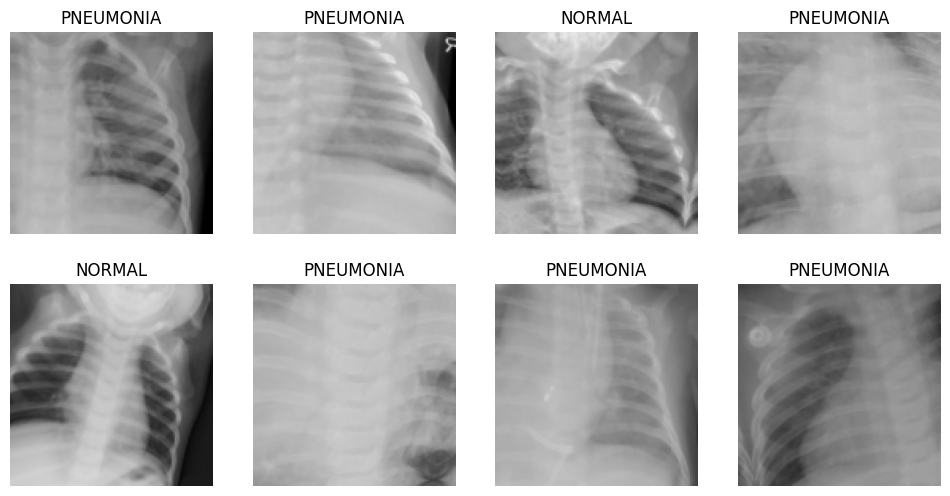

In [5]:
dls.show_batch(max_n=8, nrows=2)

In [6]:
len(dls.train_ds), len(dls.valid_ds)

(10464, 1248)

In [7]:
# ResNet introduced residual connections, they allow to train networks with an unseen number 
# of layers (up to 1000). ResNet won the 2015 ILSVRC & COCO competition, one important 
# milestone in deep computer vision.

resnet18 = vision_learner(dls, resnet18, metrics=[error_rate, accuracy, Precision(), Recall(), F1Score()])
resnet18.fine_tune(epochs=5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 145MB/s] 


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.489850,0.403274,0.163462,0.836538,0.844498,0.905128,0.873762,01:22


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.260109,0.244584,0.072115,0.927885,0.913669,0.976923,0.944238,01:11
1,0.195426,0.231985,0.072115,0.927885,0.903981,0.989744,0.944920,01:13
2,0.162665,0.207976,0.070513,0.929487,0.902326,0.994872,0.946341,01:11
3,0.129349,0.165389,0.056090,0.943910,0.923628,0.992308,0.956737,01:11
4,0.134599,0.158872,0.046474,0.953526,0.934940,0.994872,0.963975,01:11


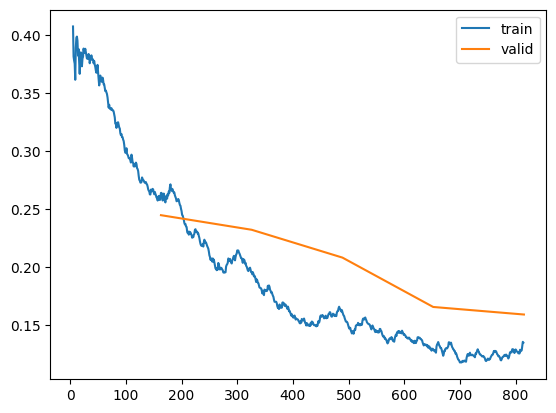

In [8]:
resnet18.recorder.plot_loss()

In [9]:
# save (the mode 'w+b' opens and truncates the file to 0 bytes)
with open('resnet18.pkl','wb') as f:
    pickle.dump(resnet18,f)

# load the saved pkl file with following

# with open('model.pkl', 'rb') as f:
#     resnet18 = pickle.load(f)

# resnet18.predict(X[0:1])

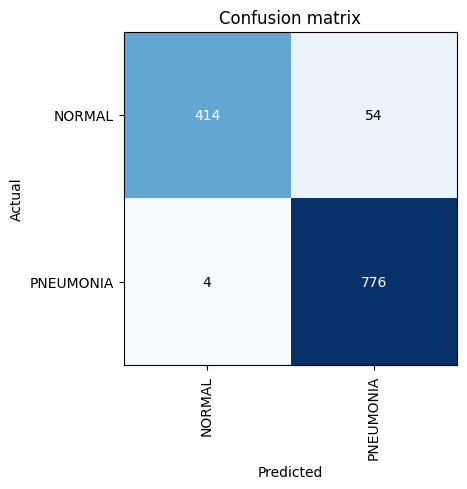

In [10]:
resnet18_interp = ClassificationInterpretation.from_learner(resnet18)
# Creating confusion matrix for resnet18 model
resnet18_interp.plot_confusion_matrix()

In [11]:
# results on Test Data
resnet18_interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.99      0.88      0.93       468
   PNEUMONIA       0.93      0.99      0.96       780

    accuracy                           0.95      1248
   macro avg       0.96      0.94      0.95      1248
weighted avg       0.96      0.95      0.95      1248



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


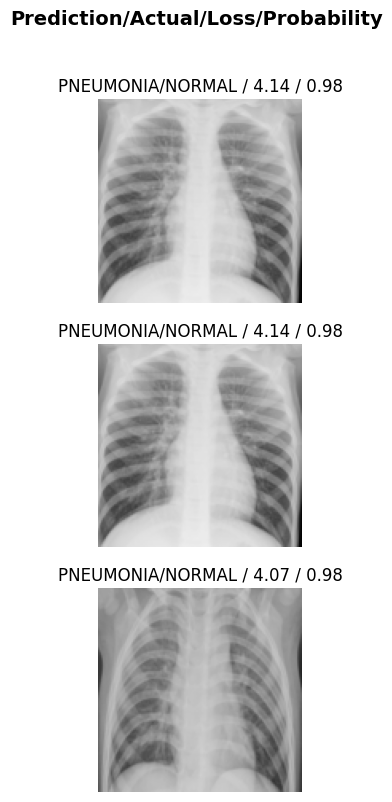

In [12]:
# Looking at top losses for resnet18 model
resnet18_interp.plot_top_losses(3, nrows=3)

In [13]:
resnet34 = vision_learner(dls, resnet34, metrics=[error_rate,accuracy, Precision(), Recall(), F1Score()])
resnet34.fine_tune(epochs=5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 84.2MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.503908,0.439003,0.152244,0.847756,0.855422,0.910256,0.881988,01:11


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.248233,0.297287,0.123397,0.876603,0.848552,0.976923,0.908224,01:12
1,0.178992,0.276411,0.105769,0.894231,0.856828,0.997436,0.921801,01:12
2,0.145681,0.128425,0.051282,0.948718,0.936585,0.984615,0.960000,01:12
3,0.128010,0.173811,0.064103,0.935897,0.908879,0.997436,0.951100,01:12
4,0.106597,0.169640,0.065705,0.934295,0.908665,0.994872,0.949816,01:12


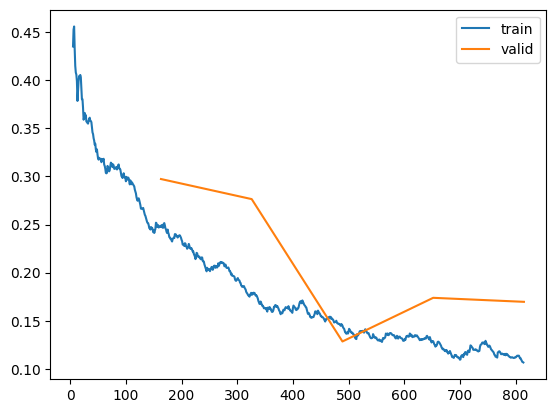

In [14]:
resnet34.recorder.plot_loss()

In [15]:
with open('resnet34.pkl','wb') as f:
    pickle.dump(resnet34,f)

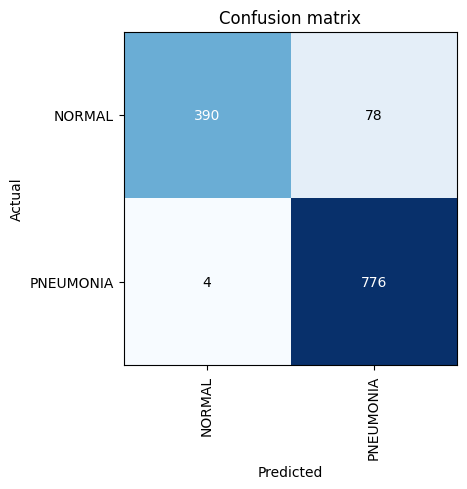

In [16]:
resnet34_interp = ClassificationInterpretation.from_learner(resnet34)
# Creating confusion matrix for resnet34 model
resnet34_interp.plot_confusion_matrix()

In [17]:
# results on Test Data
resnet34_interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.99      0.83      0.90       468
   PNEUMONIA       0.91      0.99      0.95       780

    accuracy                           0.93      1248
   macro avg       0.95      0.91      0.93      1248
weighted avg       0.94      0.93      0.93      1248



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


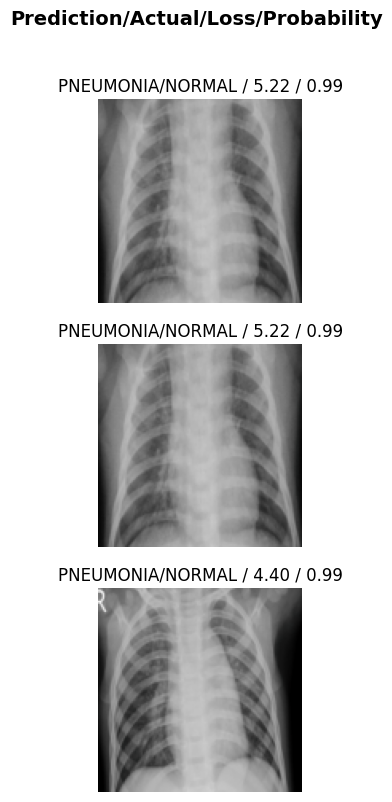

In [18]:
# Looking at top losses
resnet34_interp.plot_top_losses(3, nrows=3)

In [19]:
resnet50 = vision_learner(dls, resnet50, metrics=[error_rate, accuracy, Precision(), Recall(), F1Score()])
resnet50.fine_tune(epochs=5)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 129MB/s] 


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.541387,0.427116,0.171474,0.828526,0.869452,0.853846,0.861578,01:15


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.300008,0.286234,0.105769,0.894231,0.911168,0.920513,0.915816,01:17
1,0.213476,0.253997,0.091346,0.908654,0.881007,0.987179,0.931076,01:16
2,0.155161,0.193408,0.068910,0.931090,0.916067,0.979487,0.946716,01:15
3,0.139346,0.195832,0.067308,0.932692,0.910377,0.989744,0.948403,01:16
4,0.140510,0.172881,0.064103,0.935897,0.914692,0.989744,0.950739,01:16


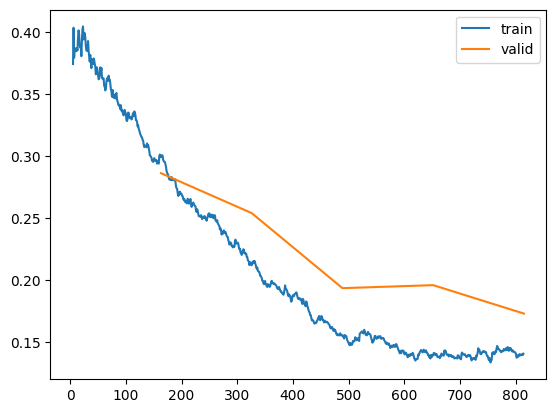

In [20]:
resnet50.recorder.plot_loss()

In [21]:
with open('resnet50.pkl','wb') as f:
    pickle.dump(resnet50,f)

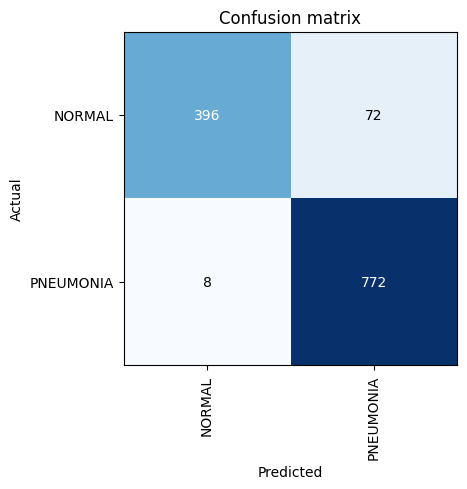

In [22]:
resnet50interp = ClassificationInterpretation.from_learner(resnet50)
# Creating confusion matrix for resnet50 model
resnet50interp.plot_confusion_matrix()

In [23]:
# results on Test Data
resnet50interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.98      0.85      0.91       468
   PNEUMONIA       0.91      0.99      0.95       780

    accuracy                           0.94      1248
   macro avg       0.95      0.92      0.93      1248
weighted avg       0.94      0.94      0.93      1248



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


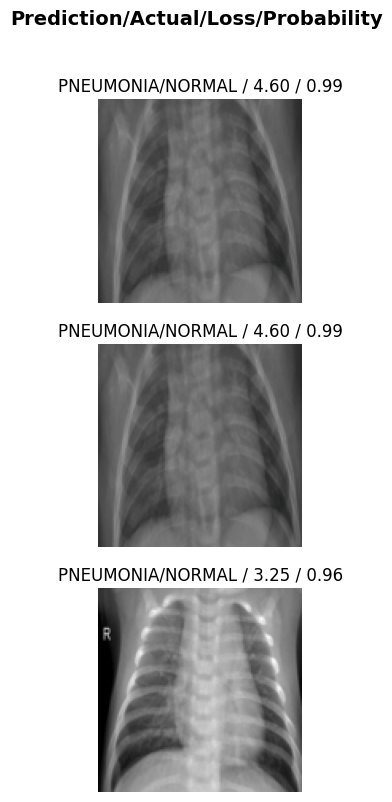

In [24]:
# Looking at top losses
resnet50interp.plot_top_losses(3, nrows=3)

In [25]:
timm.list_models('convnext_tiny', pretrained = True)

['convnext_tiny.fb_in1k',
 'convnext_tiny.fb_in22k',
 'convnext_tiny.fb_in22k_ft_in1k',
 'convnext_tiny.fb_in22k_ft_in1k_384',
 'convnext_tiny.in12k',
 'convnext_tiny.in12k_ft_in1k',
 'convnext_tiny.in12k_ft_in1k_384']

In [26]:
# ConvNeXT is a pure convolutional model (ConvNet), inspired by the design of Vision Transformers,
# that claims to outperform them.

convnext_22k = vision_learner(dls, 'convnext_tiny.fb_in22k_ft_in1k_384', metrics=[error_rate, accuracy, Precision(), Recall(), F1Score()])
convnext_22k.fine_tune(epochs=5)

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.454076,0.300974,0.126603,0.873397,0.916890,0.876923,0.896461,01:20


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.249705,0.528072,0.187500,0.812500,0.771372,0.994872,0.868981,01:35
1,0.195694,0.198833,0.078526,0.921474,0.903073,0.979487,0.939729,01:36
2,0.149736,0.199014,0.072115,0.927885,0.903981,0.989744,0.944920,01:36
3,0.132615,0.202536,0.073718,0.926282,0.901869,0.989744,0.943765,01:36
4,0.134690,0.199599,0.072115,0.927885,0.902098,0.992308,0.945055,01:36


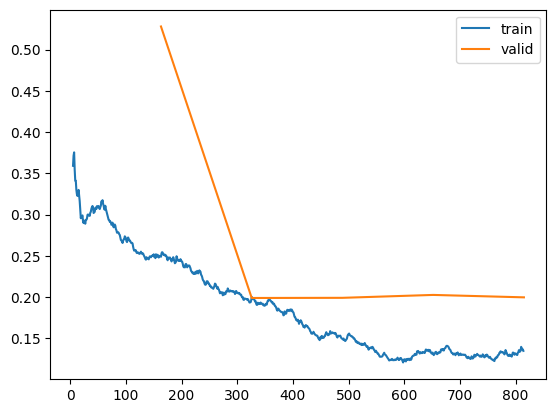

In [27]:
convnext_22k.recorder.plot_loss()

In [28]:
with open('convnext_22k.pkl','wb') as f:
    pickle.dump(convnext_22k,f)

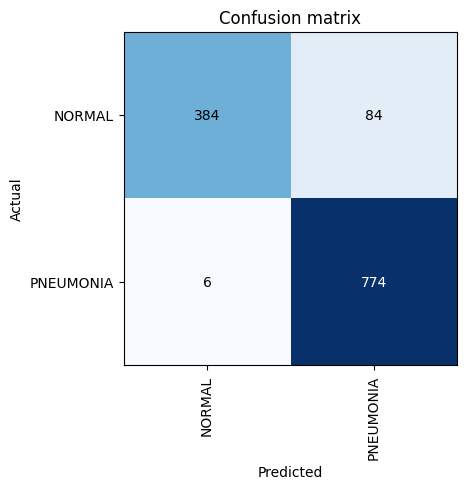

In [29]:
convnext_22kinterp = ClassificationInterpretation.from_learner(convnext_22k)
# Creating confusion matrix for the convnext_22k model
convnext_22kinterp.plot_confusion_matrix()

In [31]:
# results on Test Data
convnext_22kinterp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.98      0.82      0.90       468
   PNEUMONIA       0.90      0.99      0.95       780

    accuracy                           0.93      1248
   macro avg       0.94      0.91      0.92      1248
weighted avg       0.93      0.93      0.93      1248



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


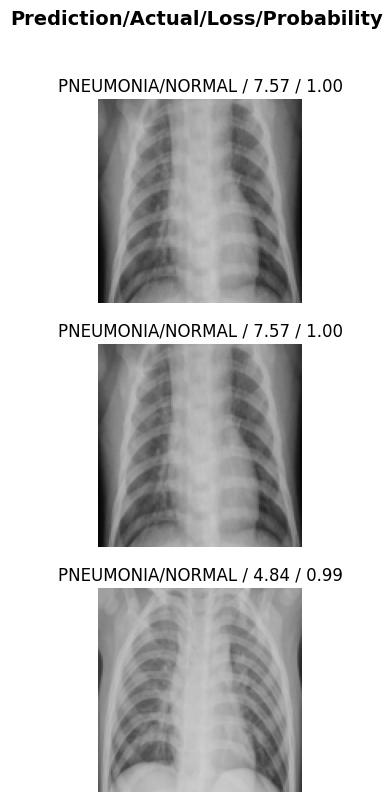

In [32]:
# Looking at top losses
convnext_22kinterp.plot_top_losses(3, nrows=3)

In [33]:
timm.list_models('levit*', pretrained = True)

['levit_128.fb_dist_in1k',
 'levit_128s.fb_dist_in1k',
 'levit_192.fb_dist_in1k',
 'levit_256.fb_dist_in1k',
 'levit_384.fb_dist_in1k',
 'levit_conv_128.fb_dist_in1k',
 'levit_conv_128s.fb_dist_in1k',
 'levit_conv_192.fb_dist_in1k',
 'levit_conv_256.fb_dist_in1k',
 'levit_conv_384.fb_dist_in1k']

In [34]:
dls_levit = get_dls(64,220, total_files)

In [35]:
# The LeViT model was proposed in LeViT: Introducing Convolutions to Vision Transformers
# LeViT improves the Vision Transformer (ViT) in performance and efficiency by a few
# architectural differences such as activation maps with decreasing resolutions in
# Transformers and the introduction of an attention bias to integrate positional information.

levit_384 = vision_learner(dls_levit,'levit_conv_128.fb_dist_in1k', metrics=[error_rate, accuracy, Precision(), Recall(), F1Score()])
levit_384.fine_tune(epochs=5)

pytorch_model.bin:   0%|          | 0.00/37.2M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.521704,1.910095,0.211538,0.788462,0.780435,0.920513,0.844706,01:18


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.393260,1.673396,0.286859,0.713141,0.690090,0.982051,0.810582,01:19
1,0.363284,9.021794,0.266026,0.733974,0.721344,0.935897,0.814732,01:20
2,0.330382,1.391170,0.195513,0.804487,0.775720,0.966667,0.860731,01:19
3,0.316271,4.609586,0.198718,0.801282,0.770325,0.971795,0.859410,01:18
4,0.296694,1.319132,0.200321,0.799679,0.766600,0.976923,0.859076,01:18


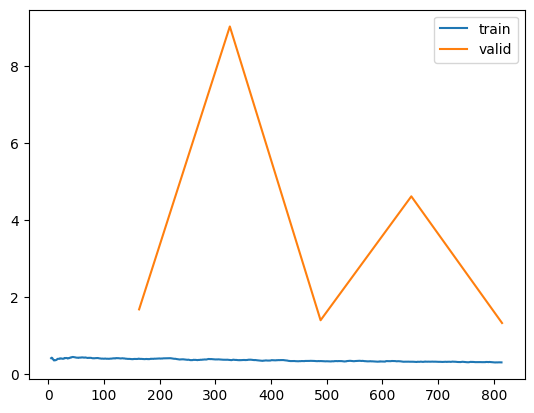

In [36]:
levit_384.recorder.plot_loss()

In [37]:
with open('levit384.pkl','wb') as f:
    pickle.dump(levit_384,f)

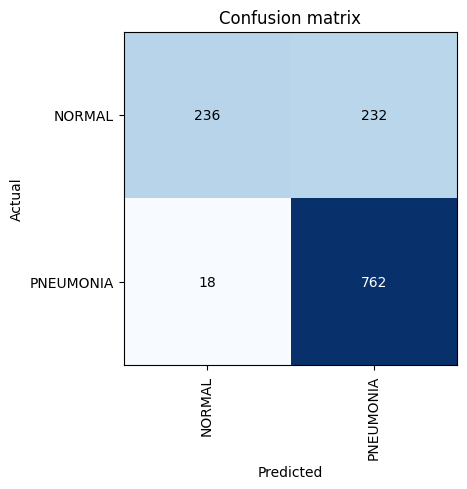

In [38]:
levit_384interp = ClassificationInterpretation.from_learner(levit_384)
# Creating confusion matrix for the LeViT_384 model
levit_384interp.plot_confusion_matrix()

In [40]:
# results on Test Data
levit_384interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.93      0.50      0.65       468
   PNEUMONIA       0.77      0.98      0.86       780

    accuracy                           0.80      1248
   macro avg       0.85      0.74      0.76      1248
weighted avg       0.83      0.80      0.78      1248



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


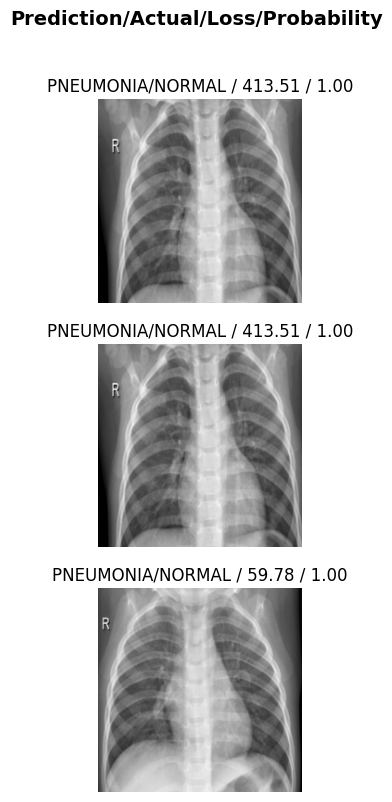

In [41]:
# Looking at top losses
levit_384interp.plot_top_losses(3, nrows=3)